In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  #(마지막 1) = 흑백인 것 명시 ! (컬러는 3)

In [4]:
train_scaled, val_scaled, train_target, val_target =\
train_test_split(train_scaled, train_target, test_size=0.2)

In [5]:
train_scaled.shape

(48000, 28, 28, 1)

In [6]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

C:\Users\2-14\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

In [11]:
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.keras',
    save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9390 - loss: 0.1590 - val_accuracy: 0.9281 - val_loss: 0.2223
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9465 - loss: 0.1427 - val_accuracy: 0.9262 - val_loss: 0.2353
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9490 - loss: 0.1335 - val_accuracy: 0.9279 - val_loss: 0.2379


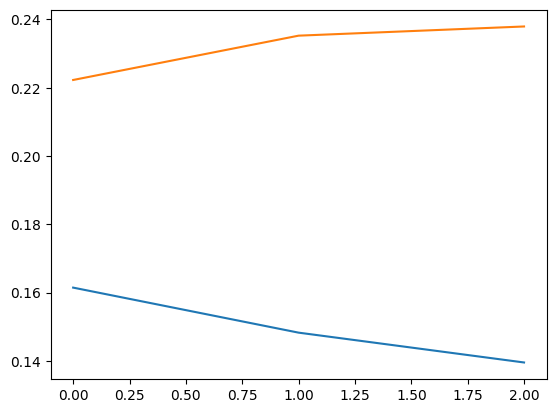

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [29]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9309 - loss: 0.2135


[0.2222747802734375, 0.9280833601951599]

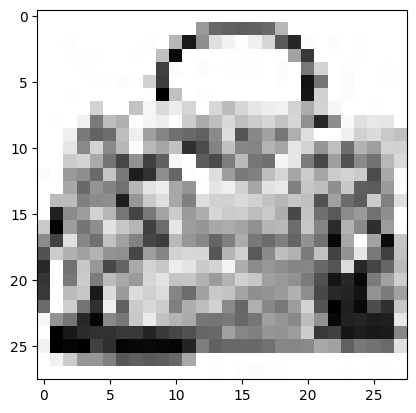

In [43]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [41]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.62, 0.  , 0.  , 0.  , 0.  , 0.  , 0.38, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]],
      dtype=float32)

In [44]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9180 - loss: 0.2637


[0.25453314185142517, 0.9168999791145325]

In [45]:
test_input.shape

(10000, 28, 28)